In [4]:
import glob,os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cm_ticker
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
import matplotlib.cm as cm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

index:0, layer:Layer 1
index:1, layer:Layer 2
index:2, layer:Layer 3
index:3, layer:Layer 4
index:4, layer:Layer 5


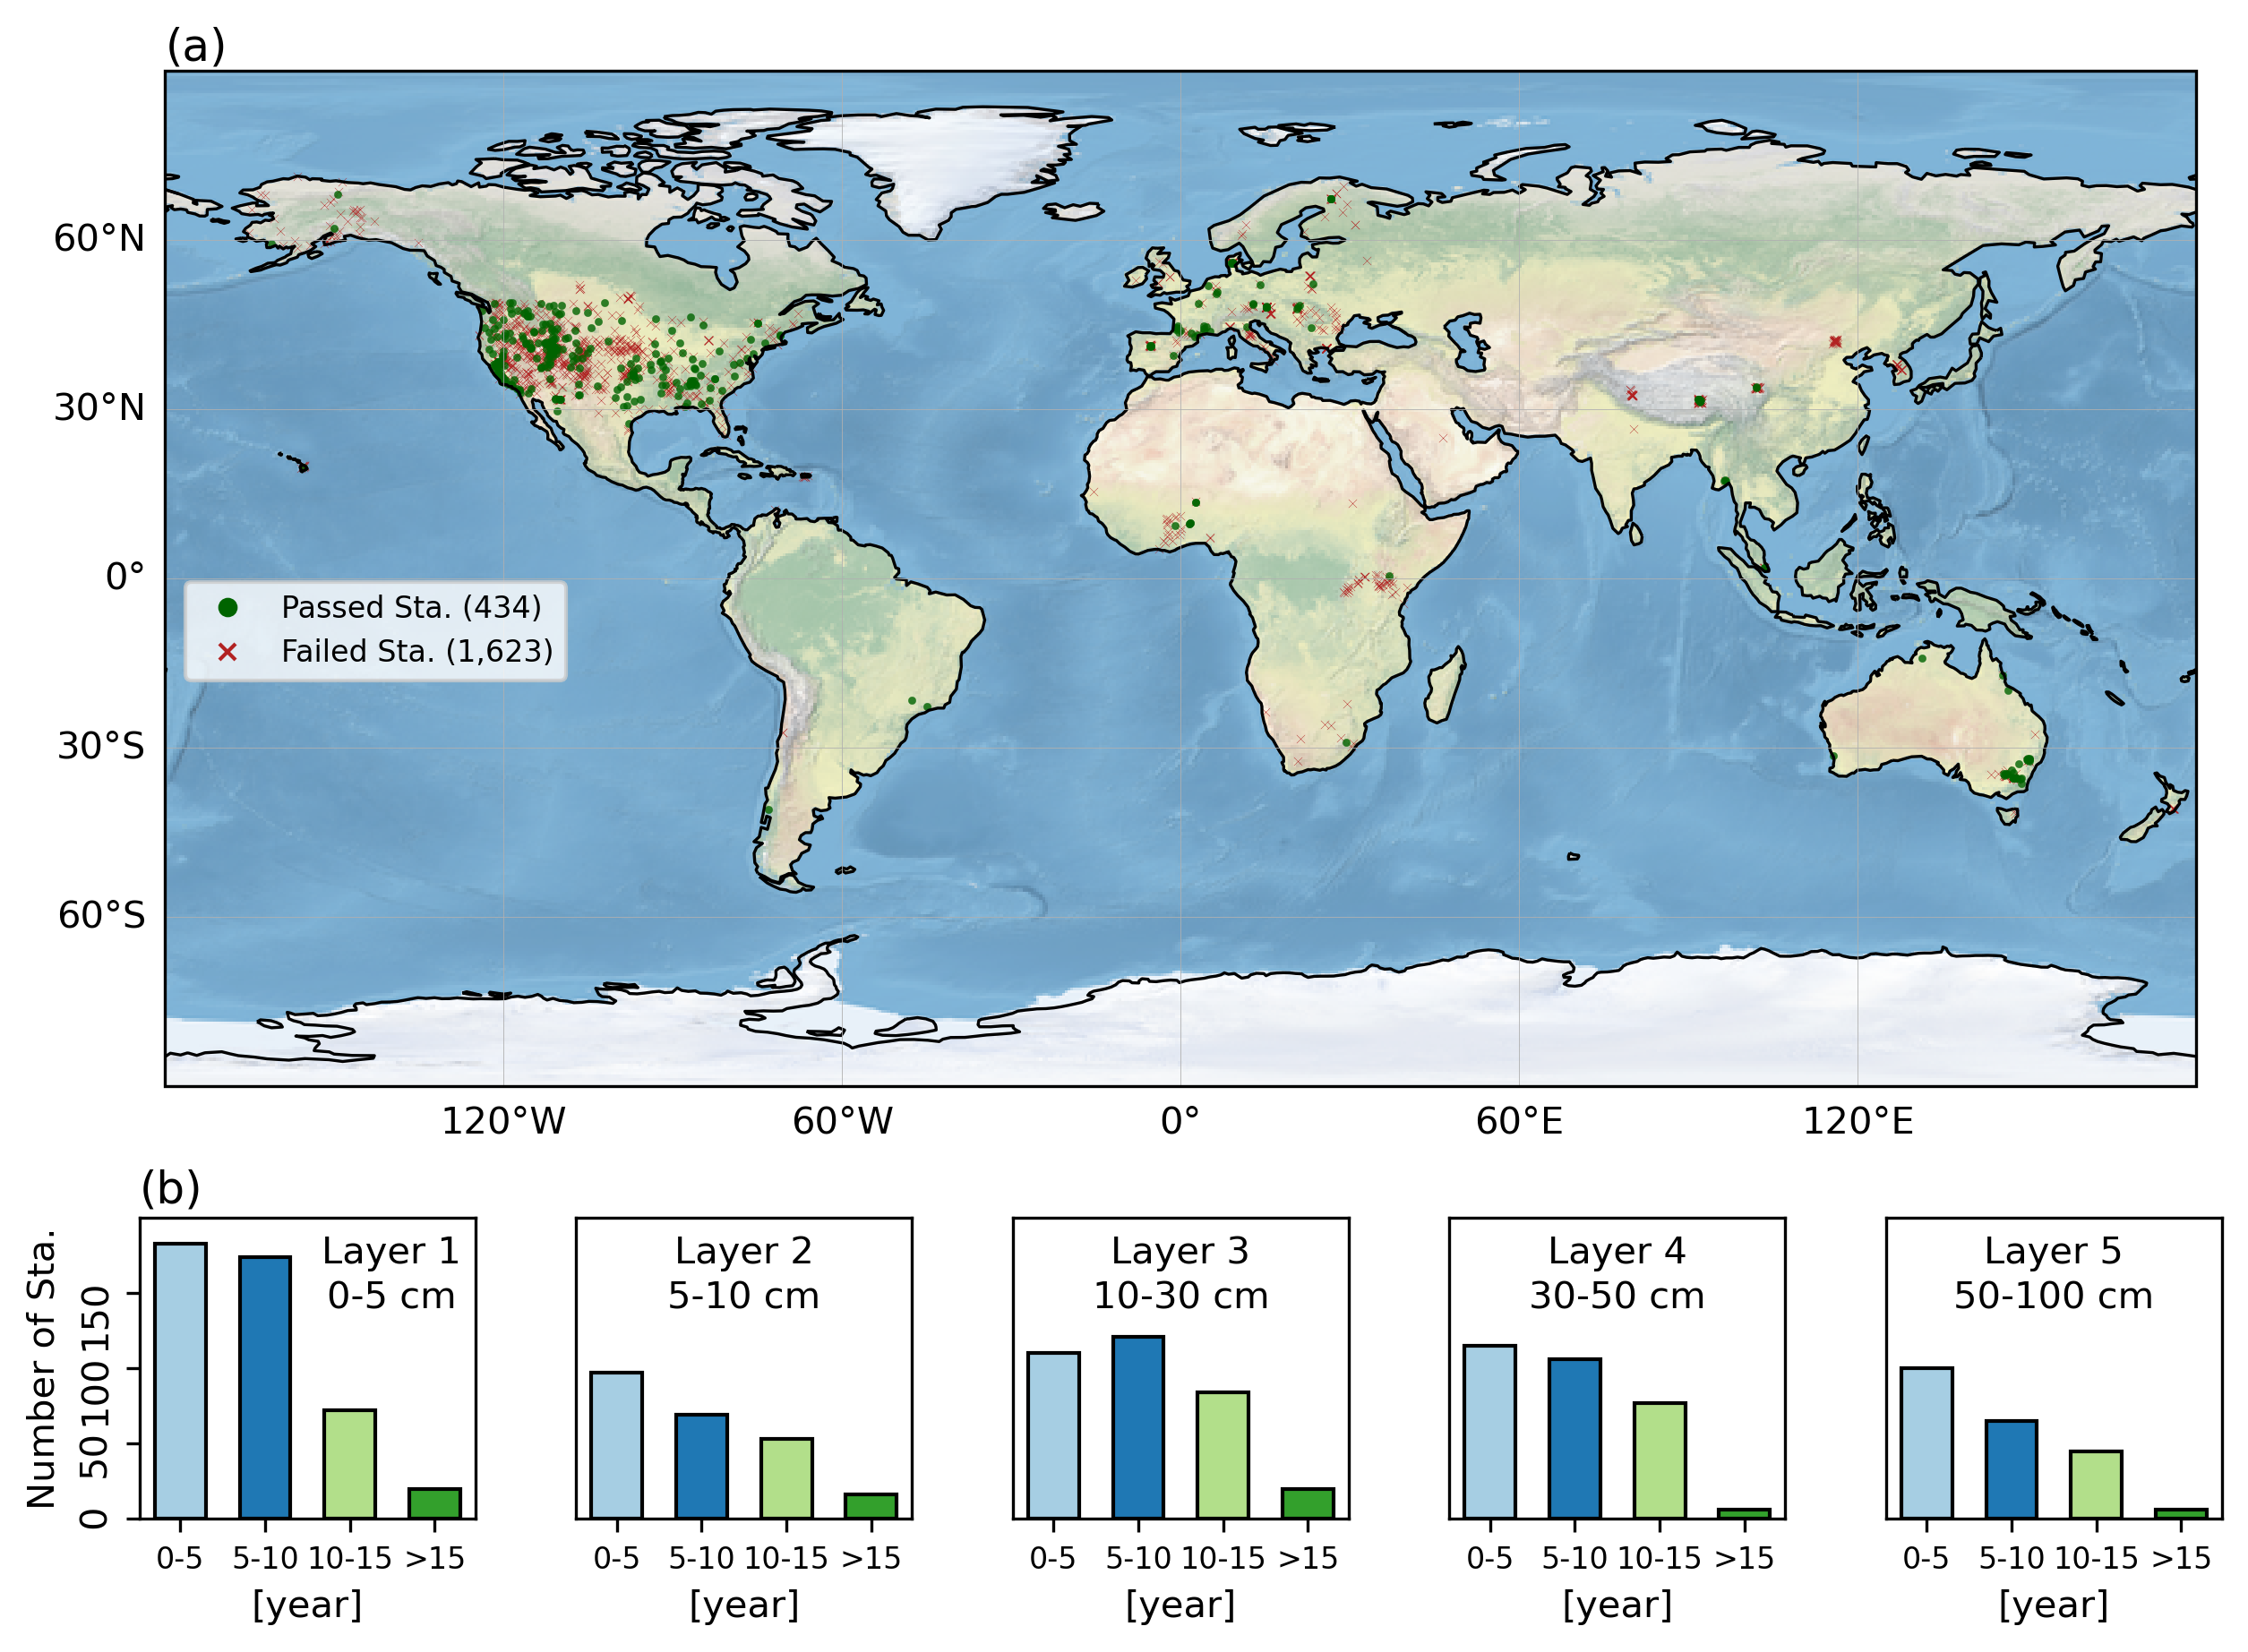

In [5]:
df = pd.read_csv(os.path.join('../plotdata','ISMN_stations_info.csv'))
fig = plt.figure(figsize=(10,7),dpi=300)
gs  = gridspec.GridSpec(2,1,figure=fig,height_ratios=[5.4,1.6])
gs1 = gridspec.GridSpecFromSubplotSpec(1, 1,
                                       subplot_spec=gs[0],)
gs2 = gridspec.GridSpecFromSubplotSpec(1, 5,
                                       subplot_spec=gs[1],
                                       wspace=0.3)

proj = ccrs.PlateCarree()
ax = fig.add_subplot(gs1[0],projection=proj)


ax.set_global()
ax.coastlines('110m',linewidth=0.8)
ax.stock_img()

ax.scatter(x=df[df['etc_pass']==0]['lon'].to_list(),
            y=df[df['etc_pass']==0]['lat'].to_list(),
            color = 'firebrick',
            s=5,
            alpha=1,
            linewidths=0.1,
            transform=ccrs.PlateCarree(),
            marker='x',
          )
ax.scatter(x=df[df['etc_pass']==1]['lon'].to_list(),
            y=df[df['etc_pass']==1]['lat'].to_list(),
            color = 'darkgreen', #"#7499dd"
            s=4,
            # edgecolors='k',
            alpha=0.8,
            linewidths=0.1,
            transform=ccrs.PlateCarree(),
            marker='o',
          )

gl = ax.gridlines(draw_labels=True,  
                  dms=True,   
                  x_inline=False, y_inline=False,   
                  xlocs=np.arange(-120, 121, 60), 
                  ylocs=np.arange(-90, 91, 30),
                 linewidth=0.2)
ax.text(0,1.01,'(a)', fontsize=12,transform=ax.transAxes)
gl.xlabels_top = False  
gl.ylabels_right = False    
dummy_scatter_1 = Line2D([0], [0], linestyle='none', marker='o', color='darkgreen', markersize=7)
dummy_scatter_2 = Line2D([0], [0], linestyle='none', marker='x', color="firebrick", markersize=7)
ax.legend([dummy_scatter_1,dummy_scatter_2], ['Passed Sta. (434)','Failed Sta. (1,623)'],loc=[0.01,0.4],
   fontsize=8,
   markerscale=0.6,
   frameon=True)
layer_data= [[183, 174,  72,  20],
            [97, 69, 53, 16],
            [110, 121,  84,  20],
            [115, 106,  77,   6],
            [100,  65,  45,   6]]
layer_list = ['Layer 1','Layer 2','Layer 3','Layer 4','Layer 5']
depths = ['0-5 cm', '5-10 cm', '10-30 cm', '30-50 cm', '50-100 cm']
c=[1,2,3,4]
norm = plt.Normalize(1,12)
cmap= cm.Paired
colors = cmap(norm(c))
for idx,layer_name in enumerate(layer_list):
    ax = fig.add_subplot(gs2[idx])
    print(f'index:{idx}, layer:{layer_name}')
    if idx==0:
        ax.text(0.75,0.85,layer_name,fontsize=10,transform=ax.transAxes,ha='center')
        ax.text(0.75,0.7,depths[idx],fontsize=10,transform=ax.transAxes,ha='center')
        ax.text(0,1.05,'(b)',fontsize=12, transform=ax.transAxes)
    else:
        ax.text(0.5,0.85,layer_name,fontsize=10,transform=ax.transAxes,ha='center')
        ax.text(0.5,0.7,depths[idx],fontsize=10,transform=ax.transAxes,ha='center')
    ax.bar(['0-5','5-10','10-15','>15'],
        height = layer_data[idx],
        align='center',
        color=colors,
          edgecolor='k',
          width=0.6)
    ax.set_ylim(0,200)
    ax.set_yticks([])
    ax.set_xlabel('[year]',fontsize=10)
    ax.set_xticks([0,1,2,3],['0-5','5-10','10-15','>15'],fontsize=8)
    if idx ==0:
        ax.set_yticks([0,50,100,150],[0,50,100,150],fontsize=10)
        ax.tick_params(axis='y', labelrotation=90) 
        ax.set_ylabel('Number of Sta.',fontsize=10)

# plt.savefig('../Figures/Figure2.jpg',dpi=600,bbox_inches='tight')